<a href="https://colab.research.google.com/github/submouse9903/test-1/blob/master/U47768_CH05_CNN(CIFAR_10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

100%|██████████| 170498071/170498071 [00:12<00:00, 13262072.85it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
# 이미지를 보여주기 위한 함수
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [ ]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

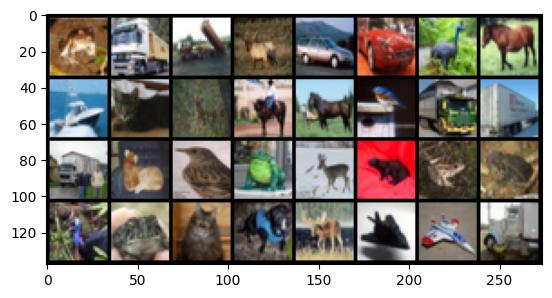

In [ ]:
batchsize = 32
train_loader = torch.utils.data.DataLoader(train_dataset, batchsize)

# 학습용 이미지를 무작위로 가져오기
dataiter = iter(train_loader)
images, labels = next(dataiter)
# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))

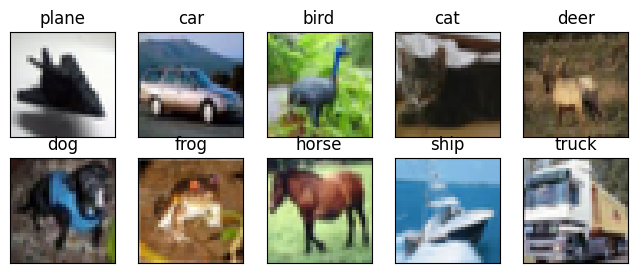

In [ ]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 클래스 별로 이미지 그리기
fig = plt.figure(figsize=(8,3))
for i in range(len(classes)):
    # 클래스에 해당하는 인덱스 찾기
    idx = train_dataset.targets.index(i)
    # 이미지 가져오기
    img = train_dataset.data[idx]
    # 이미지 그리기
    ax = fig.add_subplot(2, 5, i+1, xticks=[], yticks=[])
    ax.set_title(classes[i])
    plt.imshow(img)
plt.show()

In [ ]:
batchsize = 32
train_loader = torch.utils.data.DataLoader(train_dataset, batchsize)

In [ ]:
for i, (dataset, target) in enumerate(train_loader):
  print(dataset.shape)
  print(dataset[0,:,:,:])
  print(target[0])
  if i==0:
    break

torch.Size([32, 3, 32, 32])
tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.03

In [ ]:
class MyNeuralNetwork(nn.Module):
    def __init__(self):
        super(MyNeuralNetwork, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride =1, padding= 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride =1, padding= 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.layer3 = nn.Sequential(
            nn.Linear(in_features=64*8*8, out_features=128, bias=True),
            nn.ReLU(),
            nn.Linear(in_features=128, out_features=64, bias=True),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=10, bias=True),
            nn.Sigmoid(),
            nn.Softmax(dim = 1)
        )

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(x.shape[0], -1)
        x = self.layer3(x)
        return x

In [ ]:
model = MyNeuralNetwork()
for i, (data, target) in enumerate(train_loader):
  output = model(data)
  if i==0:
    break
output[0]

tensor([0.0998, 0.1018, 0.1024, 0.1013, 0.0999, 0.1005, 0.0975, 0.0990, 0.0965,
        0.1011], grad_fn=<SelectBackward0>)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(1)
if device == 'cuda':
    torch.cuda.manual_seed_all(1)

In [ ]:
device

'cuda'

In [ ]:
model = MyNeuralNetwork().to(device)

In [ ]:
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
cross_entropy = nn.CrossEntropyLoss().to(device)  

In [ ]:
num_B = 50
loss_vec = np.zeros(num_B)
optimizer.zero_grad()

for i in range(num_B):
  val_vec = []
  if i == 5:
    print("Learning rate is updated")
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate/2)
  for j, (data, target) in enumerate(train_loader):
    data = data.to(device)
    target = target.to(device)
    output = model(data)
    loss = cross_entropy(output, target)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    predicted = torch.max(output.data,1)
    v =((predicted.indices == target).sum()).item()/len(target)
    val_vec.append(v)
  if i%10==0:
    print ("Accuracy: {:.4f}".format(np.array(val_vec).mean()))

Accuracy: 0.3211
Learning rate is updated
Accuracy: 0.6854
Accuracy: 0.7572
Accuracy: 0.8062
Accuracy: 0.8359


In [ ]:
test_loader = torch.utils.data.DataLoader(test_dataset, batchsize)
for i, (dataset, target) in enumerate(test_loader):
  print(dataset[0,:,:,:].shape)
  break


torch.Size([3, 32, 32])


In [ ]:
v = 0
for i, (dataset, target) in enumerate(test_loader):
  X = dataset.to(device)
  Y = target.to(device)
  output = model(X)
  predicted = torch.max(output.data,1)
  v = v + ((predicted.indices == Y).sum()).item()
print(v)

6898


In [ ]:
"Accuracy is {:.4f}%".format(v/len(test_dataset.targets))

'Accuracy is 0.6898%'